### Elevation change drived by altimeter 


In [1]:
from utils.geotif_io import readTiff
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import xarray as xr
import numpy as np


In [2]:
path_setp_vec = 'data/boundary/setp_zhao2022.gpkg'
path_dem = 'data/dem-data/srtm-c/SRTMGL3_900m.tif'
path_ele_change_isat1 = 'data/ele-change-result/ele_change_isat1_tiles_sub.nc'
path_ele_change_isat2 = 'data/ele-change-result/ele_change_isat2_tiles_sub.nc'
path_ele_change_cryo2 = 'data/ele-change-result/ele_change_cryo2_tiles_sub.nc'
path_ele_change_dems = 'data/ele-change-result/ele_change_dems_tiles_sub.nc'
path_ele_change_fused = 'data/ele-change-result/ele_change_fused_tiles_sub.nc'
# path_ele_change_dems_tiles = 'data/aster-stereo/ele_change_dems_tiles.nc'


In [3]:
dem, dem_info = readTiff(path_dem)
ele_change_isat1_xr = xr.open_dataset(path_ele_change_isat1)
ele_change_isat2_xr = xr.open_dataset(path_ele_change_isat2)
ele_change_cryo2_xr = xr.open_dataset(path_ele_change_cryo2)
ele_change_dems_xr = xr.open_dataset(path_ele_change_dems)
ele_change_fused_xr = xr.open_dataset(path_ele_change_fused)
# ele_change_dems_tiles_xr = xr.open_dataset(path_ele_change_dems_tiles)
ele_change_isat1_xr
ele_change_cryo2_xr
ele_change_dems_xr
ele_change_fused_xr


<xarray.Dataset>
Dimensions:                            (tiles_id: 112, years: 23,
                                        years_2000_2012: 13, years_2012_2022: 11)
Coordinates:
  * tiles_id                           (tiles_id) object 'tile_270_960' ... '...
  * years                              (years) object '2000' '2001' ... '2022'
  * years_2000_2012                    (years_2000_2012) object '2000' ... '2...
  * years_2012_2022                    (years_2012_2022) object '2012' ... '2...
Data variables: (12/20)
    tiles_lat                          (tiles_id) int64 ...
    tiles_lon                          (tiles_id) int64 ...
    area_glacier_tiles                 (tiles_id) float64 ...
    ele_change_setp                    (years) float64 ...
    ele_change_setp_fitting            (years) float64 ...
    ele_change_setp_fitting_2000_2012  (years_2000_2012) float64 ...
    ...                                 ...
    rate_tiles                         (tiles_id) float64 ...
    rate_error_tiles                   (tiles_id) float64 ...
    rate_2000_2012_tiles               (tiles_id) float64 ...
    rate_error_2000_2012_tiles         (tiles_id) float64 ...
    rate_2012_2022_tiles               (tiles_id) float64 ...
    rate_error_2012_2022_tiles         (tiles_id) float64 ...

### 1. Averaged elevation change.

In [4]:
print('Elevation change rate by aster dems: %f +/- %f' % (ele_change_dems_xr['rate_setp'], ele_change_dems_xr['rate_error_setp']))
print('Elevation change rate by icesat-1: %f +/- %f' % (ele_change_isat1_xr['rate_setp'], ele_change_isat1_xr['rate_error_setp']))
print('Elevation change rate by icesat-2: %f +/- %f' % (ele_change_isat2_xr['rate_setp'], ele_change_isat2_xr['rate_error_setp']))
print('Elevation change rate by cryosat-2: %f +/- %f' % (ele_change_cryo2_xr['rate_setp'], ele_change_cryo2_xr['rate_error_setp']))
print('Elevation change rate by multiple data fusion: %f +/- %f' % (ele_change_fused_xr['rate_setp'], ele_change_fused_xr['rate_error_setp']))


Elevation change rate by aster dems: -0.603805 +/- 0.296360
Elevation change rate by icesat-1: -1.179263 +/- 0.440122
Elevation change rate by icesat-2: -0.336730 +/- 0.117726
Elevation change rate by cryosat-2: -1.065336 +/- 0.108559
Elevation change rate by multiple data fusion: -0.709511 +/- 0.045893


#### Elevation change on setp glacier by multiple altimeters data.

In [5]:
ele_change_fused_xr.ele_change_setp.values
ele_change_fused_xr.ele_change_setp.values[-1]-ele_change_fused_xr.ele_change_setp.values[0]

-16.942106629028345

In [6]:
print('icesat1:', ele_change_isat1_xr['rate_setp'].values, ele_change_isat1_xr['rate_error_setp'].values)
print('icesat2:', ele_change_isat2_xr['rate_setp'].values, ele_change_isat2_xr['rate_error_setp'].values)
print('cryosat2:', ele_change_cryo2_xr['rate_setp'].values, ele_change_cryo2_xr['rate_error_setp'].values)
print('aster dems:', ele_change_dems_xr['rate_setp'].values, ele_change_dems_xr['rate_error_setp'].values)
print('averaged 2000-2012:', ele_change_fused_xr['rate_2000_2012_setp'].values, ele_change_fused_xr['rate_error_2000_2012_setp'].values)
print('averaged 2012-2022:', ele_change_fused_xr['rate_2012_2022_setp'].values, ele_change_fused_xr['rate_error_2012_2022_setp'].values)
print('averaged 2000-2022:', ele_change_fused_xr['rate_setp'].values, ele_change_fused_xr['rate_error_setp'].values)



icesat1: -1.179263019560164 0.44012193360503377
icesat2: -0.33673009772920975 0.11772605095874397
cryosat2: -1.0653360984422091 0.10855890982904626
aster dems: -0.6038050340668785 0.2963603863014696
averaged 2000-2012: -0.5828590023298202 0.051706063125642764
averaged 2012-2022: -0.7837593482732393 0.03527075334886123
averaged 2000-2022: -0.7095110518525167 0.04589274255976238


Text(0.5, 0, 'Year')

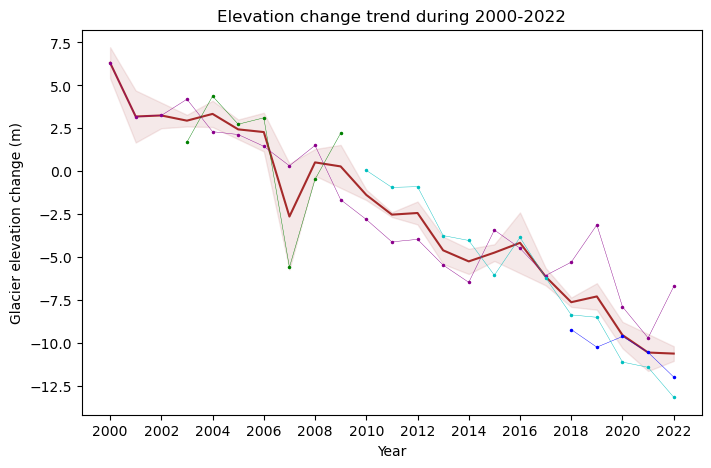

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
residual_fit_dems = abs(ele_change_dems_xr['ele_change_cor_setp'].values - ele_change_dems_xr['ele_change_cor_fitting_setp'].values)
residual_fit_isat1 = abs(ele_change_isat1_xr['ele_change_cor_setp'].values - ele_change_isat1_xr['ele_change_cor_fitting_setp'].values)
residual_fit_isat2 = abs(ele_change_isat2_xr['ele_change_cor_setp'].values - ele_change_isat2_xr['ele_change_cor_fitting_setp'].values)
residual_fit_cryo2 = abs(ele_change_cryo2_xr['ele_change_cor_setp'].values - ele_change_cryo2_xr['ele_change_cor_fitting_setp'].values)
residual_fit_fused = abs(ele_change_fused_xr['ele_change_setp'].values - ele_change_fused_xr['ele_change_setp_fitting'].values)


#### fused elevation changes
years_fused = [int(year) for year in ele_change_fused_xr.years.values]
plt.plot(years_fused, ele_change_fused_xr['ele_change_setp'], '-', color='Brown', label='elevation change by multisource satellite data fusion')   ### 
# plt.plot(years_fused, ele_change_fused_xr['ele_change_setp_fitting'], '--', color='Brown', linewidth=0.5, label='elevation change by multisource satellite data fusion')   
plt.fill_between(years_fused, ele_change_fused_xr['ele_change_setp'] - residual_fit_fused, \
                 ele_change_fused_xr['ele_change_setp'] + residual_fit_fused, color='Brown', alpha=0.1)
plt.xticks([year for year in range(years_fused[0], years_fused[-1]+1, 2)], [year for year in range(years_fused[0], years_fused[-1]+1, 2)])
plt.title('Elevation change trend during 2000-2022')


### dems
years_dem = [int(year) for year in ele_change_dems_xr.years.values]
plt.plot(years_dem, ele_change_dems_xr['ele_change_cor_setp'], '.-', linewidth=0.3, markersize=3, color='DarkMagenta', label='elevation change by dems')   ### bin-based area weighting -> tile-based area weighting
# plt.plot(years_dem, ele_change_dems_xr['ele_change_cor_fitting_setp'], '-r', label='bins weighting and then tiles weighting')   ### bin-based area weighting -> tile-based area weighting
# plt.fill_between(years_dem, ele_change_dems_xr['ele_change_cor_setp'] - residual_fit_dems, \
#                         ele_change_dems_xr['ele_change_cor_setp'] + residual_fit_dems, color='DarkMagenta', alpha=0.3)

### icesat-1
years_isat1 = [int(year) for year in ele_change_isat1_xr.years.values]
plt.plot(years_isat1, ele_change_isat1_xr['ele_change_cor_setp'], '.-g', linewidth=0.3, markersize=3, label='elevation change by icesat-1')   ### bin-based area weighting -> tile-based area weighting
# plt.plot(years_isat1, ele_change_isat1_xr['ele_change_cor_fitting_setp'], '-r', label='bins weighting and then tiles weighting')   ### bin-based area weighting -> tile-based area weighting
# plt.fill_between(years_isat1, ele_change_isat1_xr['ele_change_cor_setp'] - residual_fit_isat1, \
#                  ele_change_isat1_xr['ele_change_cor_setp'] + residual_fit_isat1, color='green', alpha=0.3)

### icesat-2
years_isat2 = [int(year) for year in ele_change_isat2_xr.years.values]
plt.plot(years_isat2, ele_change_isat2_xr['ele_change_cor_setp'], '.-b', linewidth=0.3, markersize=3, label='elevation change by icesat-2')   ### bin-based area weighting -> tile-based area weighting
# plt.plot(years_isat2, ele_change_isat2_xr['ele_change_cor_fitting_setp'], '-r', label='bins weighting and then tiles weighting')   ### bin-based area weighting -> tile-based area weighting
# plt.fill_between(years_isat2, ele_change_isat2_xr['ele_change_cor_setp'] - residual_fit_isat2, \
#                  ele_change_isat2_xr['ele_change_cor_setp'] + residual_fit_isat2, color='b', alpha=0.3)

### cryosat-2
years_cryo2 = [int(year) for year in ele_change_cryo2_xr.years.values]
plt.plot(years_cryo2, ele_change_cryo2_xr['ele_change_cor_setp'], '.-c', linewidth=0.3, markersize=3, label='elevation change by cryosat-2')   ### bin-based area weighting -> tile-based area weighting
# plt.plot(years_cryo2, ele_change_cryo2_xr['ele_change_cor_fitting_setp'], '-r', label='bins weighting and then tiles weighting')   ### bin-based area weighting -> tile-based area weighting
# plt.fill_between(years_cryo2, ele_change_cryo2_xr['ele_change_cor_setp'] - residual_fit_cryo2, \
#                  ele_change_cryo2_xr['ele_change_cor_setp'] + residual_fit_cryo2, color='red', alpha=0.3)


ax.set_ylabel('Glacier elevation change (m)')
ax.set_xlabel('Year')


### 2.Tile-based elevation change mapping

In [8]:
# Scatterplot
def scatterplot(x, y, size, color, color_range=[-1.5, -1, -0.5], cmap_dhdt=plt.cm.get_cmap('Reds').reversed(), color_min=-1.5, color_max=0):
  cmap_dem = LinearSegmentedColormap.from_list('linear color', ["DimGray", "white"])
  fig = plt.figure(figsize=(10,6))
  ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator(central_longitude=88.5))
  ax.set_extent([91, 99, 27.3, 32])
  ax_dem = ax.imshow(dem, extent=dem_info['geoextent'], 
                                  vmin=2500, vmax=6000, cmap=cmap_dem, \
                                  transform=ccrs.PlateCarree(), zorder=0)   ## cmap:PRGn

  ## 1. Tibeteau southeast boundary
  shp_fea = cfeature.ShapelyFeature(Reader(path_setp_vec).geometries(), \
                        crs=ccrs.PlateCarree(), edgecolor='lightgreen', linewidth=1, facecolor='none')

  ax.add_feature(shp_fea, zorder=0)
  scatter = ax.scatter(
      # x = ele_change_xr['tiles_lon'].values/10+0.25, 
      # y = ele_change_xr['tiles_lat'].values/10+0.25, 
      # s = ele_change_xr['area_glacier_tiles'].values/1.5,
      # c = ele_change_xr['rate_tiles'].values,
      x = x,
      y = y,
      s = size,
      c = color,
      cmap=cmap_dhdt,
      alpha=1, 
      linewidth=2,
      vmin=color_min,
      vmax=color_max,
      transform=ccrs.PlateCarree(),
      )
  ax.gridlines(draw_labels=True, linewidth=1, alpha=1, zorder=1, color='grey', linestyle='--')

  # produce a legend with the unique colors from the scatter
  handles, labels = scatter.legend_elements(prop="colors", num=color_range)
  legend_color = ax.legend(handles, labels, loc="lower left", title="dh/dt \n($m/yr$)",\
                              facecolor='white', edgecolor='black', borderpad=0.8, labelspacing=1.25, markerscale=2)

  # produce a legend with a cross-section of sizes from the scatter
  handles, labels = scatter.legend_elements(prop="sizes", num=[100, 300, 500], alpha=0.2)
  print(labels)
  legend_glacier_area = ax.legend(handles, [100, 300, 500], loc="lower left", title="Glacier area\n     (${km^2}$)", \
                                      edgecolor='black', borderpad = 0.8, labelspacing=1.2, bbox_to_anchor=(0.15, 0.))

  ax.add_artist(legend_color)
  ax.add_artist(legend_glacier_area)
  return ax



### Dems derived scatterplot.

In [9]:
x_tiles_sub = ele_change_dems_xr['tiles_lon'].values/10+0.25 
y_tiles_sub = ele_change_dems_xr['tiles_lat'].values/10+0.25
size_tiles_sub = ele_change_dems_xr['area_glacier_tiles'].values/1.5
color_rate_tiles_sub_dems = ele_change_dems_xr['rate_tiles'].values
color_rate_tiles_sub_fused = ele_change_fused_xr['rate_tiles'].values
color_rate_tiles_sub_fused_2000_2012 = ele_change_fused_xr['rate_2000_2012_tiles'].values
color_rate_tiles_sub_fused_2012_2022 = ele_change_fused_xr['rate_2012_2022_tiles'].values


['$\\mathdefault{100}$', '$\\mathdefault{300}$', '$\\mathdefault{500}$']


Text(0.5, 1.0, 'Elevation change during 2000-2022')

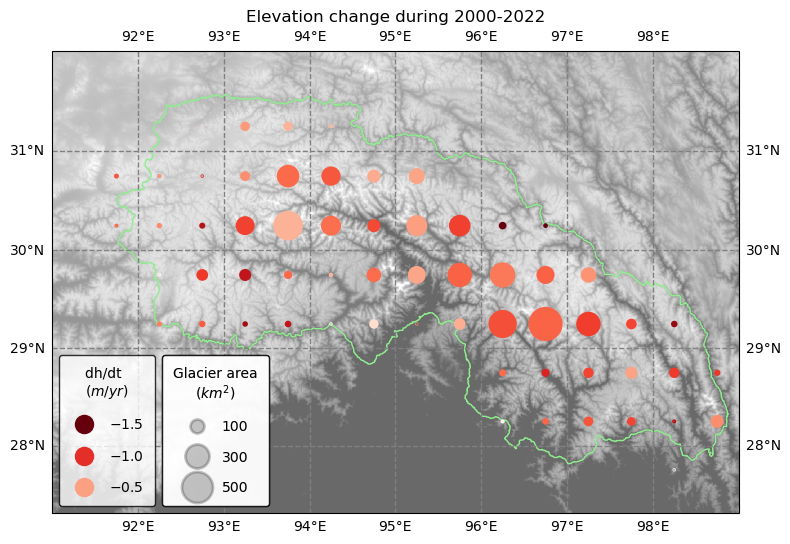

In [10]:
scatterplot(x=x_tiles_sub, y=y_tiles_sub, size=size_tiles_sub, color=color_rate_tiles_sub_fused, color_range=[-1.5, -1, -0.5])
plt.title('Elevation change during 2000-2022')



['$\\mathdefault{100}$', '$\\mathdefault{300}$', '$\\mathdefault{500}$']


Text(0.5, 1.0, 'Elevation change during 2000-2012')

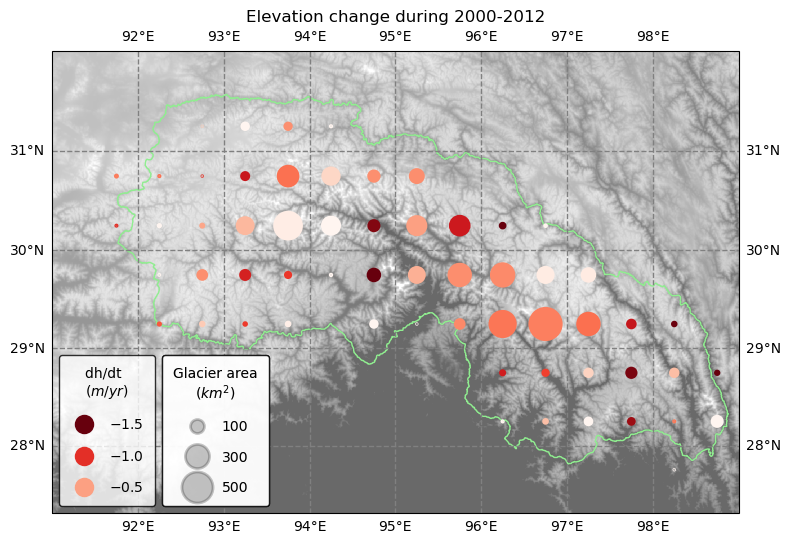

In [11]:
scatterplot(x=x_tiles_sub, y=y_tiles_sub, size=size_tiles_sub, color=color_rate_tiles_sub_fused_2000_2012)
plt.title('Elevation change during 2000-2012')


['$\\mathdefault{100}$', '$\\mathdefault{300}$', '$\\mathdefault{500}$']


Text(0.5, 1.0, 'Elevation change during 2012-2022')

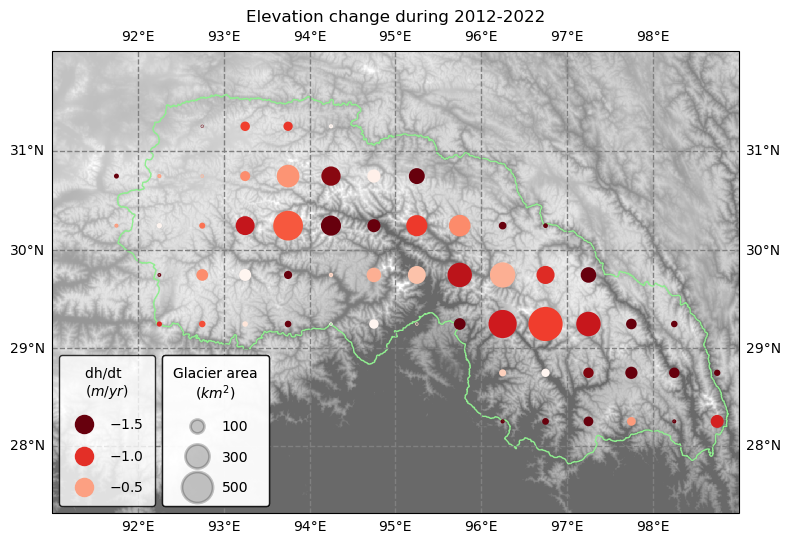

In [12]:
scatterplot(x=x_tiles_sub, y=y_tiles_sub, size=size_tiles_sub, color=color_rate_tiles_sub_fused_2012_2022)
plt.title('Elevation change during 2012-2022')


### Elevation change rate during 2000-2022 vs. 2013-2022


In [13]:
color_rate_dif_tiles_sub = color_rate_tiles_sub_fused_2012_2022 - color_rate_tiles_sub_fused_2000_2012


['$\\mathdefault{100}$', '$\\mathdefault{300}$', '$\\mathdefault{500}$']


Text(0.5, 1.0, 'Difference of elevation change rates between 2000-2012 and 2012-2022')

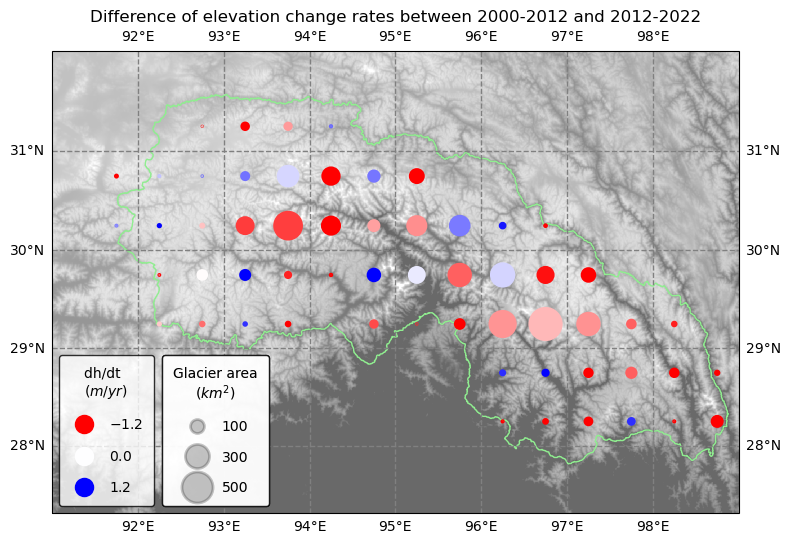

In [14]:
scatterplot(x=x_tiles_sub, y=y_tiles_sub, size=size_tiles_sub, color=color_rate_dif_tiles_sub , \
                                              color_range=[-1.2, 0, 1.2], color_min=-1, color_max=1, cmap_dhdt=plt.cm.get_cmap('bwr').reversed())
plt.title('Difference of elevation change rates between 2000-2012 and 2012-2022')



Glacier area percentage of the seleced tile: 0.8336925158851193


Text(0.5, 1.0, 'glacier area of tiles')

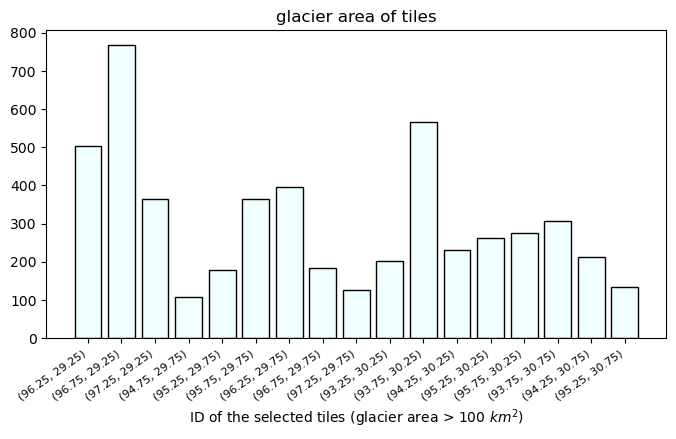

In [15]:
tile_ids_sel = np.where(ele_change_fused_xr.area_glacier_tiles.values>100)[0]
lons_tile_sel = ele_change_fused_xr.tiles_lon.values[tile_ids_sel]/10+0.25
lats_tile_sel = ele_change_fused_xr.tiles_lat.values[tile_ids_sel]/10+0.25
loc_tile_sel = list(zip(lons_tile_sel, lats_tile_sel))
x_tile_ids_sel = np.arange(len(tile_ids_sel))
print('Glacier area percentage of the seleced tile:', np.sum(ele_change_fused_xr.area_glacier_tiles.values[tile_ids_sel])/np.sum(ele_change_fused_xr.area_glacier_tiles.values))
fig, ax = plt.subplots(1,1, figsize=(8,4))
ax.bar(x_tile_ids_sel, height=ele_change_fused_xr.area_glacier_tiles.values[tile_ids_sel], width=0.8, color ='Azure', edgecolor ='black')
ax.set_xticks(x_tile_ids_sel, loc_tile_sel, fontsize=8, rotation=35, ha='right')
plt.xlabel('ID of the selected tiles (glacier area > 100 $km^2$)') 
plt.title('glacier area of tiles')



In [16]:
ele_change_fused_xr.rate_tiles.values[tile_ids_sel]


array([-0.85954716, -0.77595409, -0.92963279, -0.74205903, -0.47422454,
       -0.7796182 , -0.68391118, -0.78404277, -0.55736542, -0.911541  ,
       -0.42134366, -0.72690883, -0.50696643, -0.9147144 , -0.74527979,
       -0.82564095, -0.48586662])

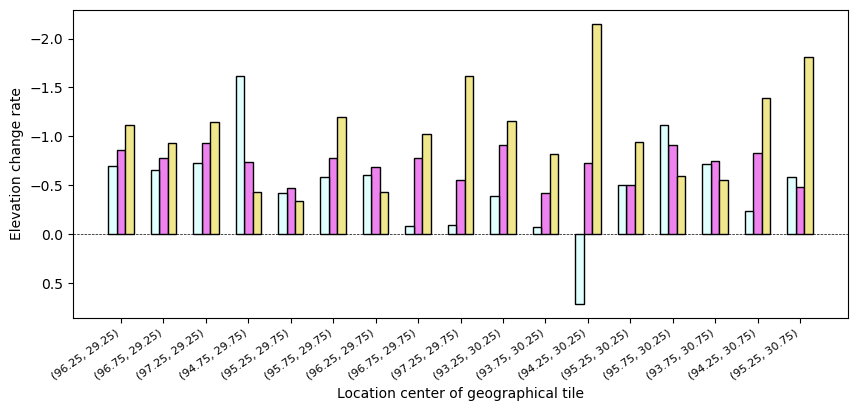

In [17]:
rate_sel_tiles = ele_change_fused_xr.rate_tiles.values[tile_ids_sel]
rate_2000_2012_sel_tiles = ele_change_fused_xr.rate_2000_2012_tiles.values[tile_ids_sel]
rate_2012_2022_sel_tiles = ele_change_fused_xr.rate_2012_2022_tiles.values[tile_ids_sel]
fig, ax = plt.subplots(1,1, figsize=(10,4))
ax.bar(x_tile_ids_sel, height=rate_sel_tiles, width=0.2, color ='Violet', edgecolor ='black')
ax.bar(x_tile_ids_sel-0.2, height=rate_2000_2012_sel_tiles, width=0.2, color ='LightCyan', edgecolor ='black')
ax.bar(x_tile_ids_sel+0.2, height=rate_2012_2022_sel_tiles, width=0.2, color ='Khaki', edgecolor ='black')
ax.invert_yaxis()
ax.set_xticks(x_tile_ids_sel, loc_tile_sel, fontsize=8, rotation=35, ha='right')
plt.xlabel('Location center of geographical tile') 
plt.ylabel('Elevation change rate')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)



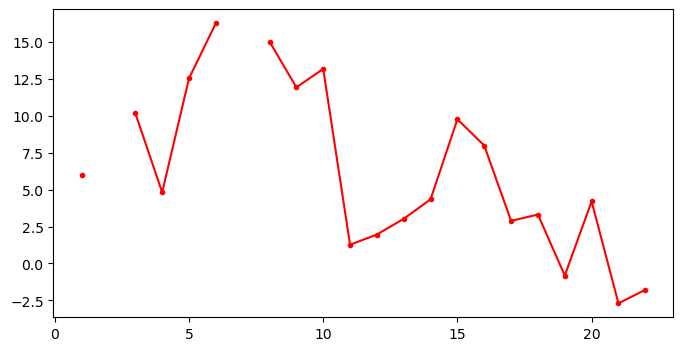

In [18]:
### the location of (30.25, 94.25)
fig, ax = plt.subplots(1,1,figsize=(8,4))
tile_id = np.where(ele_change_fused_xr.tiles_id.values=='tile_300_940')
ele_change_tile = ele_change_fused_xr.ele_change_tiles[tile_id].values
# ax.scatter(np.arange(ele_change_tile.shape[1]), ele_change_tile[0], marker = '.', color='red')
ax.plot(np.arange(ele_change_tile.shape[1]), ele_change_tile[0], marker = '.', color='red')


### Bin-based elevation change mapping


Text(0.5, 1.0, 'Altitudinal distribution of glacier elevation change rates')

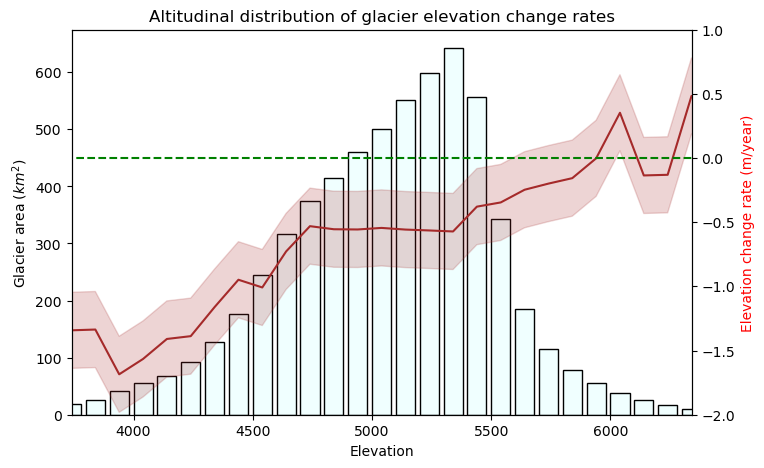

In [19]:
ele_bins_start = [ele_bin[0:4] for ele_bin in ele_change_dems_xr['bins_id'].values]
# bins_id = ele_change_dems_xr['bins_id'].values
# bins_id_start = [bin_id[0:2] for bin_id in bins_id]
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111)      # Create matplotlib axes
ax1.bar(ele_bins_start, height=ele_change_dems_xr['area_glacier_bins'], width=0.8, color ='Azure', edgecolor ='black')
ax1.set_ylabel('Glacier area ($km^2$)')
ax1.set_xlabel('Elevation')
ax2 = ax1.twinx() # Create another axes that shares the same x-axis as ax.
ax2.set_ylabel('Elevation change rate (m/year)', color='red')
ax2.plot(ele_bins_start, ele_change_dems_xr['rate_bins'], 'Brown')
plt.fill_between(ele_bins_start, ele_change_dems_xr['rate_bins'] - ele_change_dems_xr['rate_error_bins'], \
                 ele_change_dems_xr['rate_bins'] + ele_change_dems_xr['rate_error_bins'],
                 color='Brown', alpha=0.2)

ax2.hlines(y=0, xmin=0, xmax=50, colors='green', linestyles='dashed')
plt.xticks([i-0.4 for i in range(0, len(ele_bins_start), 5)], [ele_bins_start[i] for i in range(0, len(ele_bins_start), 5)])
plt.ylim(top=1, bottom=-2)
plt.xlim(left=ele_bins_start[12], right=ele_bins_start[38])
plt.xlabel('Elevation (m)') 
plt.title('Altitudinal distribution of glacier elevation change rates')


